In [55]:
import matplotlib.pyplot as plt
import psycopg2 as pg
import pandas.io.sql as psql
import pandas as pd
import numpy as np

In [60]:
connection = pg.connect("host='localhost' dbname=Corporate_employee user=postgres password='******'")
#dataframe = psql.DataFrame("SELECT * FROM category", connection)
query1 = 'SELECT * FROM salaries'
query2 = 'SELECT * FROM titles'
salaries= pd.read_sql_query(query1,con=connection)
title = pd.read_sql_query(query2,con=connection)
salaries.head()
title.head()

,emp_no,title,from_date,to_date
0,10001,Senior Engineer,1986-06-26,9999-01-01
1,10002,Staff,1996-08-03,9999-01-01
2,10003,Senior Engineer,1995-12-03,9999-01-01
3,10004,Engineer,1986-12-01,1995-12-01
4,10004,Senior Engineer,1995-12-01,9999-01-01


In [61]:
datafile = pd.merge(salaries, title, on= 'emp_no')
Salary_title = datafile.drop(['from_date_x', 'to_date_x'], axis = 1)
Salary_title.head()

,emp_no,salary,title,from_date_y,to_date_y
0,10001,60117,Senior Engineer,1986-06-26,9999-01-01
1,10002,65828,Staff,1996-08-03,9999-01-01
2,10003,40006,Senior Engineer,1995-12-03,9999-01-01
3,10004,40054,Engineer,1986-12-01,1995-12-01
4,10004,40054,Senior Engineer,1995-12-01,9999-01-01


In [94]:
grouped_salaryBYtitle = Salary_title.groupby("title").mean()['salary']
salaryBYtitle = pd.DataFrame(grouped_salaryBYtitle)
standard_error = Salary_title.groupby("title").sem()['salary']
standard_error = pd.DataFrame(standard_error)
sem = standard_error['salary'].tolist()
Salary = salaryBYtitle['salary'].tolist()
title = Salary_title.title.unique()
print(sem)

[83.31652058199396, 30.4211700092825, 2463.3964604385815, 32.79183022053147, 54.16653204773154, 50.34806568576532, 83.76646963092509]


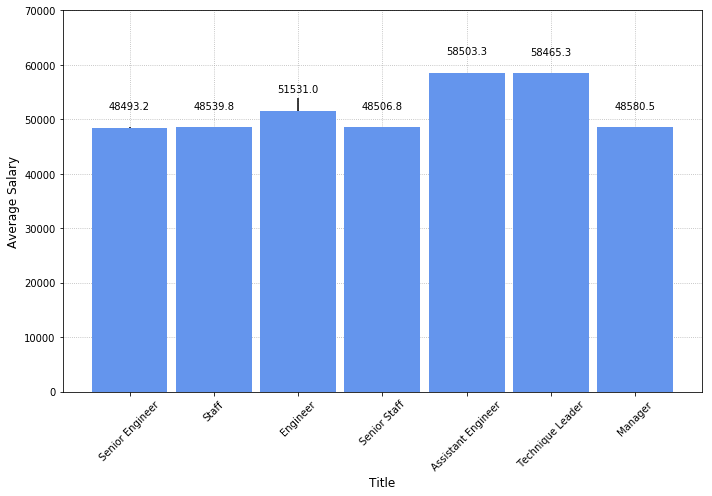



Average salary of all different level of employee looks similar which does not seem right




In [104]:

fig, ax = plt.subplots(figsize = (10, 7))
x_axis = np.arange(len(Salary))
ax.set_xticks(x_axis)
ax.set_xticklabels(title, rotation = 45)
plt.grid(linestyle = 'dotted', zorder =0)
plt.xlabel ('Title', fontsize = 12)
plt.ylabel ('Average Salary',  fontsize = 12)
plt.ylim (0, 70000)

rects1 = ax.bar(x_axis, Salary, width = 0.9, color = 'cornflowerblue', yerr = sem, zorder = 2)

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2, height + 3000, round(height,1),
        ha = 'center', va = 'bottom', alpha = 2)
autolabel(rects1)

plt.tight_layout()
plt.show()

#observation
print ('''

Average salary of all different level of employee looks similar which does not seem right.

''')